In [ ]:
!source /content/drive/MyDrive/colab_env/bin/activate;

In [ ]:
import sys
sys.path.append('/content/drive/MyDrive/colab_env/lib/python3.10/site-packages')

In [ ]:
# Install stable_baselines3 and gym_trading_env libraries
%pip install stable_baselines3
%pip install gym_trading_env

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.3/182.3 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.1/111.1 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.4/149.4 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.9/137.9 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.7/288.7 kB 13.7 MB/s eta 0:00:00


In [ ]:
#Copy the file .py modules from the specified path in Google Drive to the current working directory in Colab
!cp "/content/drive/MyDrive/MScDataScienceArtificialIntelligence/3rdSemester/Dissertation/Build/history.py" .
!cp "/content/drive/MyDrive/MScDataScienceArtificialIntelligence/3rdSemester/Dissertation/Build/portfolio.py" .
!cp "/content/drive/MyDrive/MScDataScienceArtificialIntelligence/3rdSemester/Dissertation/Build/data_processor.py" .
!cp "/content/drive/MyDrive/MScDataScienceArtificialIntelligence/3rdSemester/Dissertation/Build/environments.py" .

In [ ]:
# Importing necessary libraries for numerical operations and data manipulation
import numpy as np
import pandas as pd

# Importing libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
#Ensuring that plots are displayed inline within Jupyter notebooks
%matplotlib inline

# Importing reinforcement learning algorithms and noise processes from stable_baselines3
from stable_baselines3 import DQN, PPO
from stable_baselines3.common.noise import NormalActionNoise, OrnsteinUhlenbeckActionNoise

# Importing utility for creating vectorized environments
from stable_baselines3.common.vec_env import DummyVecEnv

# Suppressing warnings for cleaner output
import warnings
warnings.filterwarnings("ignore")

# Importing utilities for displaying output and managing time
from IPython.display import clear_output
import time

# Importing libraries for handling dates, file paths, and directories
import datetime
import glob
from pathlib import Path

# Importing collections for counting elements
from collections import Counter

# Importing gym_trading_env modules for handling historical data and portfolio management
from history import History
from portfolio import Portfolio, TargetPortfolio

# Importing gymnasium for creating and managing reinforcement learning environments
import gymnasium as gym
from gymnasium import spaces
import gymnasium
import gym_trading_env

# Importing libraries for creating temporary files and interacting with the operating system
import tempfile, os

# Importing custom modules for creating trading environments and processing data
from environments import TradingEnv
from data_processor import data_func, state_space, simulator_descrete, Visual_Simulator, Universal_Simulator

In [ ]:
gu_daily_path = "/content/drive/MyDrive/MScDataScienceArtificialIntelligence/3rdSemester/Dissertation/Build/data/GBPUSD=X daily.csv"
gu_weekly_path = "/content/drive/MyDrive/MScDataScienceArtificialIntelligence/3rdSemester/Dissertation/Build/data/GBPUSD=X weekly.csv"
gu_monthly_path = "/content/drive/MyDrive/MScDataScienceArtificialIntelligence/3rdSemester/Dissertation/Build/data/GBPUSD=X monthly.csv"
dxy_daily_path = "/content/drive/MyDrive/MScDataScienceArtificialIntelligence/3rdSemester/Dissertation/Build/data/DX-Y.NYB daily.csv"

In [ ]:
GU_daily = pd.read_csv(gu_daily_path)
GU_weekly = pd.read_csv(gu_weekly_path)
GU_monthly = pd.read_csv(gu_monthly_path)
DXY_daily = pd.read_csv(dxy_daily_path)

In [ ]:
from data_processor import data_func

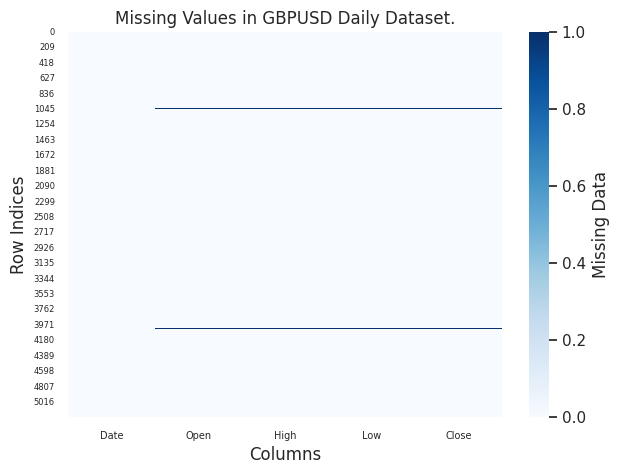

In [ ]:
# Plot graph
sns.set_theme(style="dark")
plt.figure(figsize=(7, 5))
heatmap = sns.heatmap(GU_daily.drop(['Adj Close', 'Volume'], axis=1).isna(), cmap='Blues', cbar_kws={'label': 'Missing Data'})
heatmap.set_xlabel("X-axis label", fontsize=12)
plt.xlabel('Columns')
plt.ylabel('Row Indices')
plt.title('Missing Values in GBPUSD Daily Dataset.')
plt.yticks(fontsize=6)
plt.xticks(fontsize=7)
plt.savefig('/content/drive/MyDrive/MScDataScienceArtificialIntelligence/3rdSemester/Dissertation/Build/images/GU_daily_missing.svg')
plt.show()

In [ ]:
# Get description of dataframe
GU_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5217 entries, 0 to 5216
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5217 non-null   object 
 1   Open       5200 non-null   float64
 2   High       5200 non-null   float64
 3   Low        5200 non-null   float64
 4   Close      5200 non-null   float64
 5   Adj Close  5200 non-null   float64
 6   Volume     5200 non-null   float64
dtypes: float64(6), object(1)
memory usage: 285.4+ KB


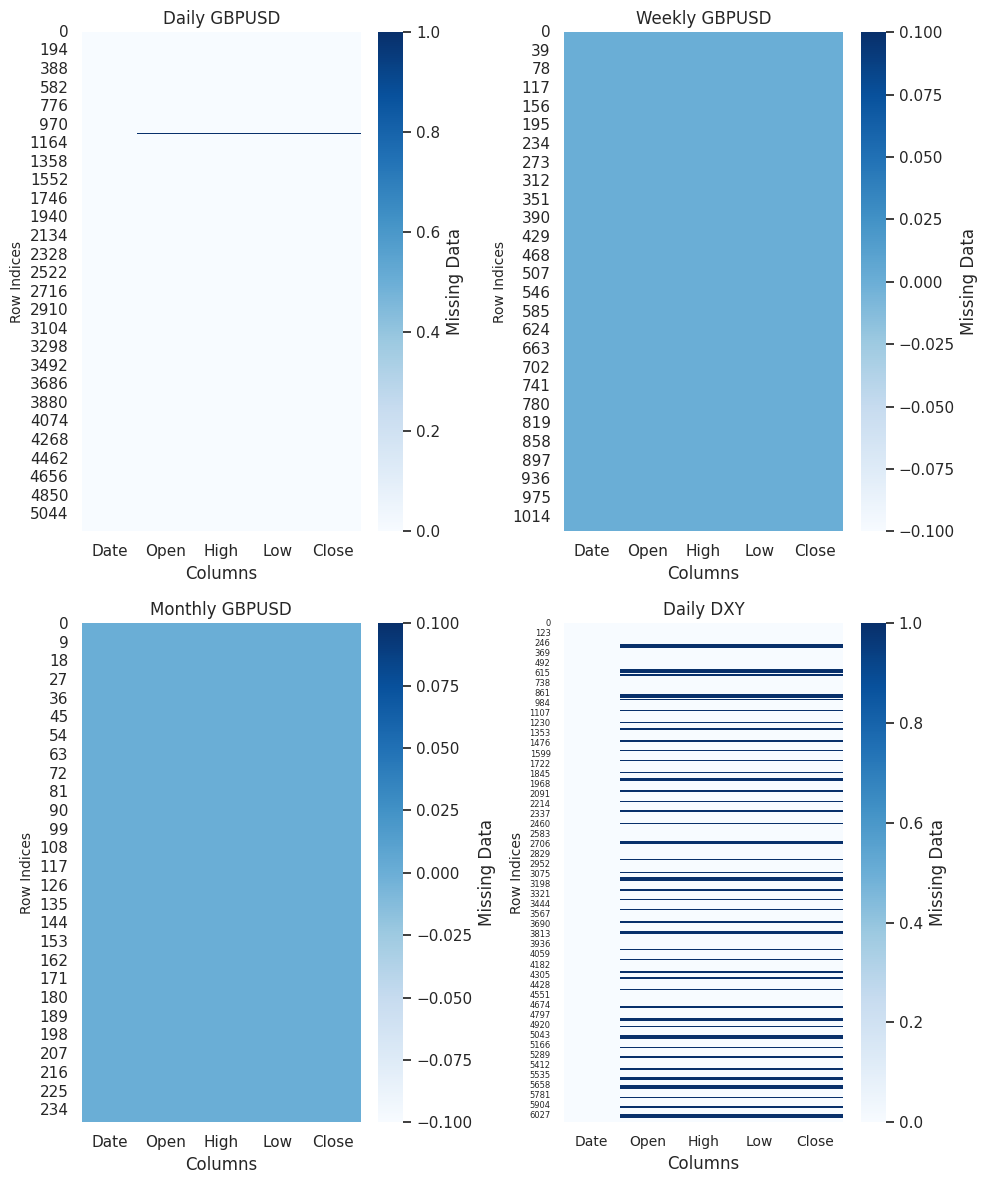

In [ ]:
sns.set_theme(style="dark")
# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 12))  # Adjust figsize

# Plot heatmaps on each subplot
datasets = [GU_daily, GU_weekly, GU_monthly, DXY_daily]
titles = ['Daily GBPUSD', 'Weekly GBPUSD', 'Monthly GBPUSD', 'Daily DXY']

for ax, data, title in zip(axes.flat, datasets, titles):
    sns.heatmap(ax=ax,
                data=data.drop(['Adj Close', 'Volume'], axis=1).isna(),
                cmap='Blues',
                cbar_kws={'label': 'Missing Data'})
    ax.set_xlabel('Columns', fontsize=12)
    ax.set_ylabel('Row Indices', fontsize=10)
    ax.set_title(title, fontsize=12)
    plt.yticks(fontsize=6)  # Adjust ytick font size
    plt.xticks(fontsize=6)  # Adjust xtick font size

plt.xticks(fontsize=10)  # Adjust xtick font size
# Adjust layout
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/MScDataScienceArtificialIntelligence/3rdSemester/Dissertation/Build/images/missing_values.svg')
plt.show()

In [ ]:
# Get description of dataframe
DXY_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6107 entries, 0 to 6106
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       6107 non-null   object 
 1   Open       5044 non-null   float64
 2   High       5044 non-null   float64
 3   Low        5044 non-null   float64
 4   Close      5044 non-null   float64
 5   Adj Close  5044 non-null   float64
 6   Volume     5044 non-null   float64
dtypes: float64(6), object(1)
memory usage: 334.1+ KB


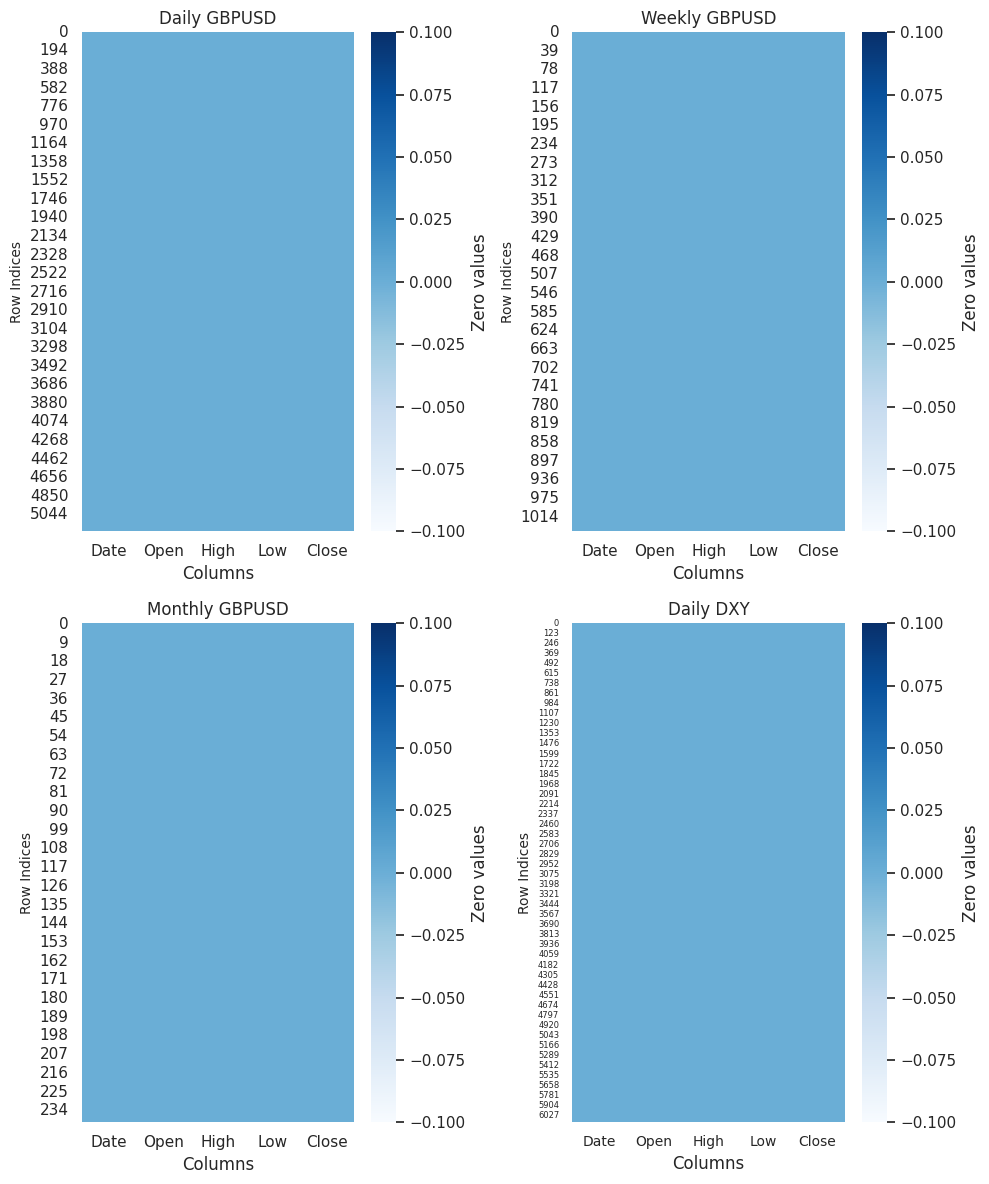

In [ ]:
sns.set_theme(style="dark")
# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 12))  # Adjust figsize

# Plot heatmaps on each subplot
datasets = [GU_daily, GU_weekly, GU_monthly, DXY_daily]
titles = ['Daily GBPUSD', 'Weekly GBPUSD', 'Monthly GBPUSD', 'Daily DXY']

for ax, data, title in zip(axes.flat, datasets, titles):
    sns.heatmap(ax=ax,
                data=data.drop(['Adj Close', 'Volume'], axis=1)==0,
                cmap='Blues',
                cbar_kws={'label': 'Zero values'})
    ax.set_xlabel('Columns', fontsize=12)
    ax.set_ylabel('Row Indices', fontsize=10)
    ax.set_title(title, fontsize=12)
    plt.yticks(fontsize=6)  # Adjust ytick font size
    plt.xticks(fontsize=6)  # Adjust xtick font size

plt.xticks(fontsize=10)  # Adjust xtick font size
# Adjust layout
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/MScDataScienceArtificialIntelligence/3rdSemester/Dissertation/Build/images/zero_values.svg')
plt.show()

In [ ]:
# Calling the data_func function to process the data from the specified file paths
Data = data_func(gu_daily_path, gu_weekly_path, gu_monthly_path, dxy_daily_path, daily_only=False)

In [ ]:
# Saving extracted dataframes from data_func
gu_daily = Data[0]
gu_weekly = Data[1]
gu_monthly = Data[2]
dxy = Data[3]

<Figure size 1000x700 with 0 Axes>

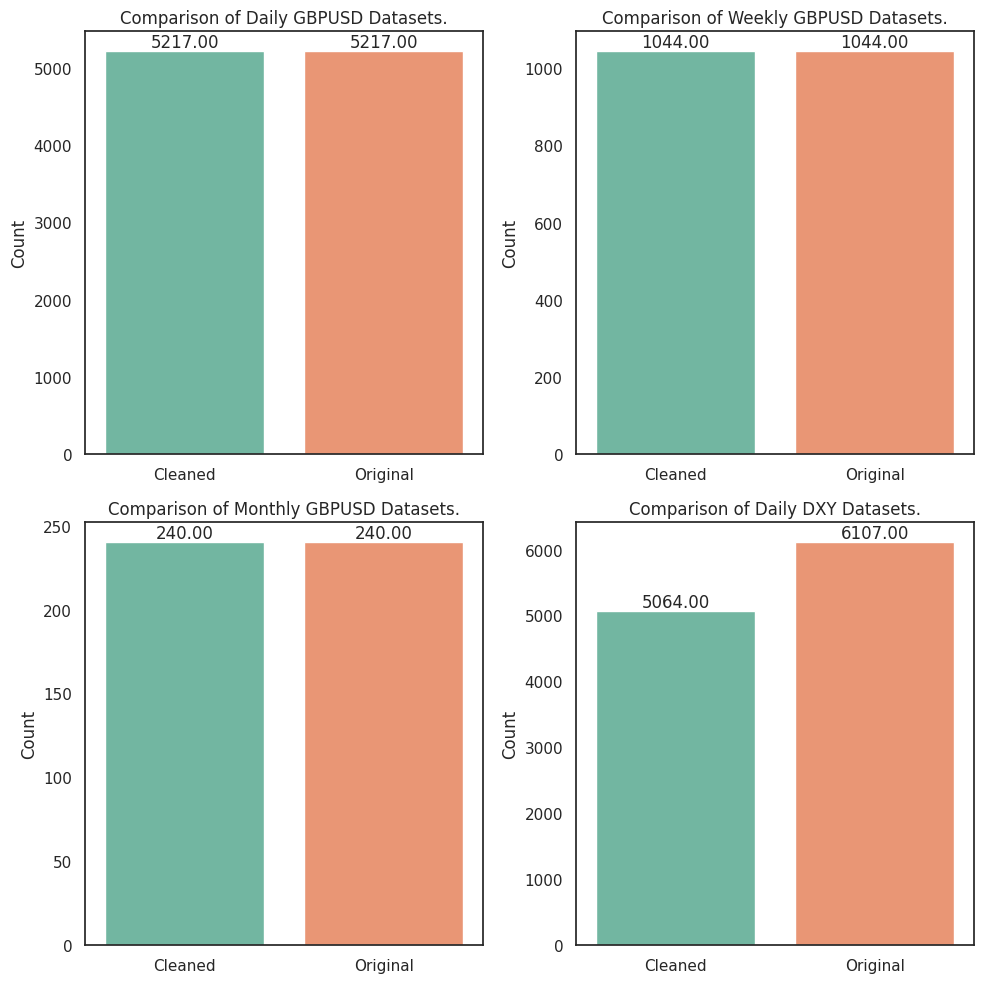

In [ ]:
# Plot graph
sns.set_theme(style="white")
plt.figure(figsize=(10, 7))
sns.set_palette("Set2")

# Create list with each dataframe's length
data = [
    [len(gu_daily), len(GU_daily)],
    [len(gu_weekly), len(GU_weekly)],
    [len(gu_monthly), len(GU_monthly)],
    [len(dxy), len(DXY_daily)]
]
# Create list of dataset names

titles = ['Daily GBPUSD', 'Weekly GBPUSD', 'Monthly GBPUSD', 'Daily DXY']

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# Plot paired bar plots
for i, ax in enumerate(axes.flat):
    sns.barplot(x=['Cleaned', 'Original'], y=[data[i][0], data[i][1]], ax=ax, hue =['Cleaned', 'Original'])
    ax.set_title(f"Comparison of {titles[i]} Datasets.")
    ax.set_ylabel('Count')

# Annotate max values
for i, ax in enumerate(axes.flat):
    for p in ax.patches:
        ax.annotate(f"{p.get_height():.2f}",
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom')

plt.tight_layout()
plt.savefig('/content/drive/MyDrive/MScDataScienceArtificialIntelligence/3rdSemester/Dissertation/Build/images/comparison.svg')
plt.show()

In [ ]:
gu_daily.head(5)

,open,high,low,close,day,week,month
date,,,,,,,
2004-01-01,1.788813,1.788813,1.781705,1.785204,4,1,1
2004-01-02,1.785587,1.795010,1.779201,1.793690,5,1,1
2004-01-05,1.795493,1.810315,1.795107,1.807207,1,2,1
2004-01-06,1.807403,1.827786,1.805510,1.821295,2,2,1
2004-01-07,1.820897,1.825584,1.812711,1.817785,3,2,1


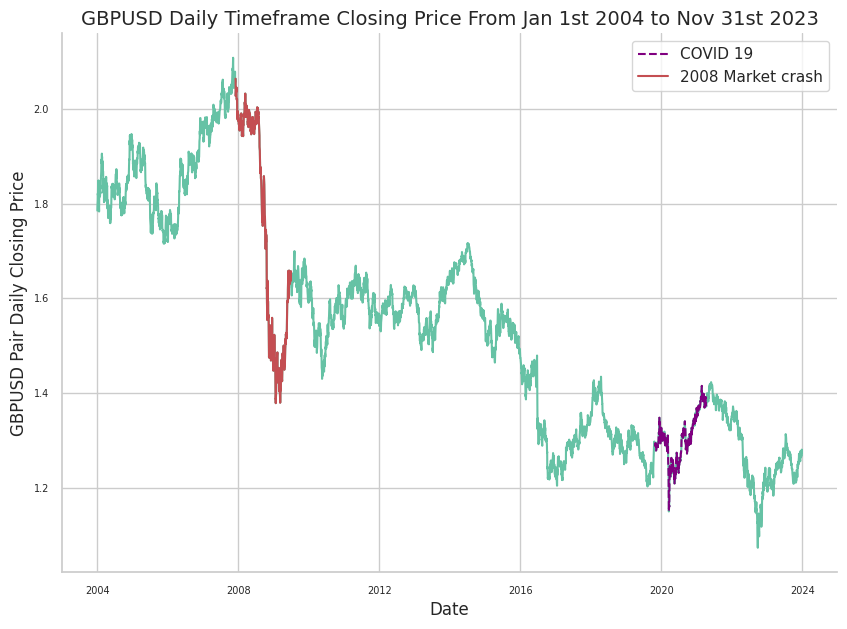

In [ ]:
# Plot graph
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 7))
sns.set_palette("Set2")

# Create the line plot
ax = sns.lineplot(data=gu_daily, x=gu_daily.index, y='close')
ax = sns.lineplot(gu_daily['close']['2019-10-30 00:00:00':'2021-04-12 00:00:00'], color='purple', linestyle='--', label='COVID 19')
ax = sns.lineplot(gu_daily['close']['2007-12-01 00:00:00':'2009-06-30 00:00:00'], color='r', linestyle='-', label='2008 Market crash')
# Customize the plot
ax.set_title('GBPUSD Daily Close')
ax.set_xlabel('Date')
ax.set_ylabel('Close Price')
plt.grid(True)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Adjust font sizes
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.title('GBPUSD Daily Timeframe Closing Price From Jan 1st 2004 to Nov 31st 2023', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('GBPUSD Pair Daily Closing Price', fontsize=12)
plt.savefig('/content/drive/MyDrive/MScDataScienceArtificialIntelligence/3rdSemester/Dissertation/Build/images/GBPUSD_daily.svg')
plt.show()

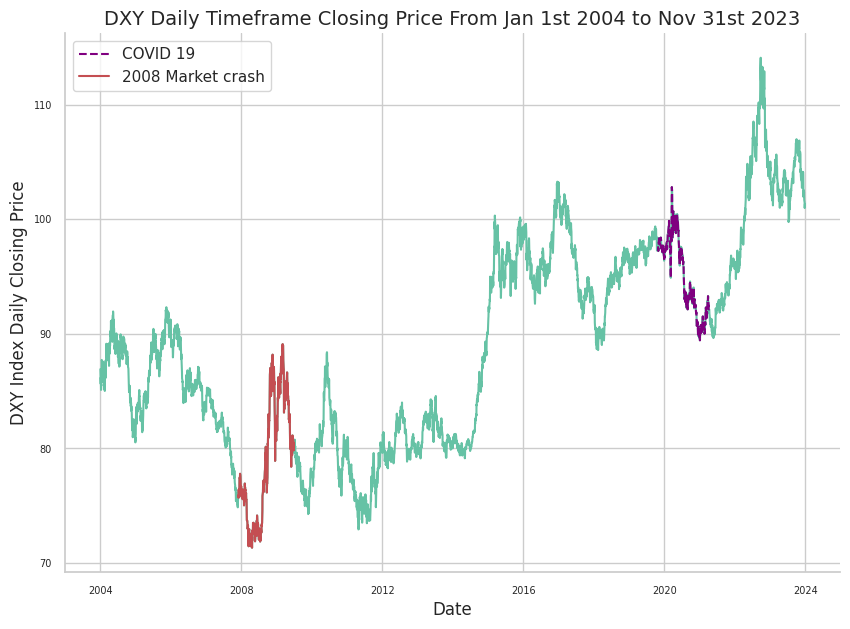

In [ ]:
# Plot graph
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 7))
sns.set_palette("Set2")

# Create the line plot
ax = sns.lineplot(data=dxy, x=dxy.index, y='close')
ax = sns.lineplot(dxy['close']['2019-10-30 00:00:00':'2021-04-12 00:00:00'], color='purple', linestyle='--', label='COVID 19')
ax = sns.lineplot(dxy['close']['2007-12-01 00:00:00':'2009-06-30 00:00:00'], color='r', linestyle='-', label='2008 Market crash')


# Customize the plot
ax.set_title('DXY Daily Close')
ax.set_xlabel('Date')
ax.set_ylabel('Close Price')
plt.grid(True)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Adjust font sizes
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.title('DXY Daily Timeframe Closing Price From Jan 1st 2004 to Nov 31st 2023', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('DXY Index Daily Closing Price', fontsize=12)
plt.savefig('/content/drive/MyDrive/MScDataScienceArtificialIntelligence/3rdSemester/Dissertation/Build/images/dxy_daily.svg')
plt.show()